## ML ASS-10

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Import heart_disease

df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/heart_disease - Eval_3_heart_disease.csv")
# 2. Print first 5 rows

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

3. Print data types of attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             914 non-null    float64
 1   Sex             916 non-null    object 
 2   ChestPainType   914 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     915 non-null    float64
 5   FastingBS       917 non-null    float64
 6   RestingECG      916 non-null    object 
 7   MaxHR           915 non-null    float64
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         916 non-null    float64
 10  ST_Slope        912 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 86.2+ KB


In [5]:
for i in df.columns:
    print(df[i].value_counts())

54.0    51
55.0    41
58.0    41
57.0    38
56.0    38
52.0    36
51.0    35
59.0    35
62.0    35
53.0    33
60.0    32
61.0    31
48.0    31
63.0    30
50.0    25
43.0    24
46.0    24
41.0    24
64.0    22
49.0    21
65.0    21
47.0    19
44.0    19
45.0    18
42.0    17
38.0    16
67.0    15
39.0    14
69.0    13
66.0    13
40.0    13
35.0    11
68.0    10
37.0    10
34.0     7
74.0     7
70.0     7
36.0     6
71.0     5
32.0     5
72.0     4
29.0     3
75.0     3
33.0     2
77.0     2
76.0     2
31.0     2
30.0     1
28.0     1
73.0     1
Name: Age, dtype: int64
M    724
F    192
Name: Sex, dtype: int64
ASY    494
NAP    202
ATA    172
TA      46
Name: ChestPainType, dtype: int64
120.0    131
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
185.0      1
98.0       1
92.0       1
113.0      1
164.0      1
Name: RestingBP, Length: 67, dtype: int64
0.0      171
254.0     11
223.0     10
220.0     10
230.0      9
        ... 
355.0      1
336.0      1
117.0      1
328.

In [6]:
# 4. Treat Missing values
df.isnull().sum()


Age               4
Sex               2
ChestPainType     4
RestingBP         1
Cholesterol       3
FastingBS         1
RestingECG        2
MaxHR             3
ExerciseAngina    1
Oldpeak           2
ST_Slope          6
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,914.000000,917.000000,915.000000,917.000000,915.000000,916.000000,918.000000
mean,53.552516,132.410033,198.969399,0.233370,136.829508,0.889301,0.553377
std,9.416258,18.519724,109.356098,0.423206,25.484139,1.066927,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
for i in ["Sex","ChestPainType","RestingECG","ExerciseAngina",
         "ST_Slope","FastingBS","Oldpeak","HeartDisease"]:
    df[i] = df[i].fillna(df[i].mode()[0])
for j in ["Age","RestingBP","Cholesterol","MaxHR"]:
    df[j] = df[j].fillna(df[j].median())
    

In [12]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1


In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0


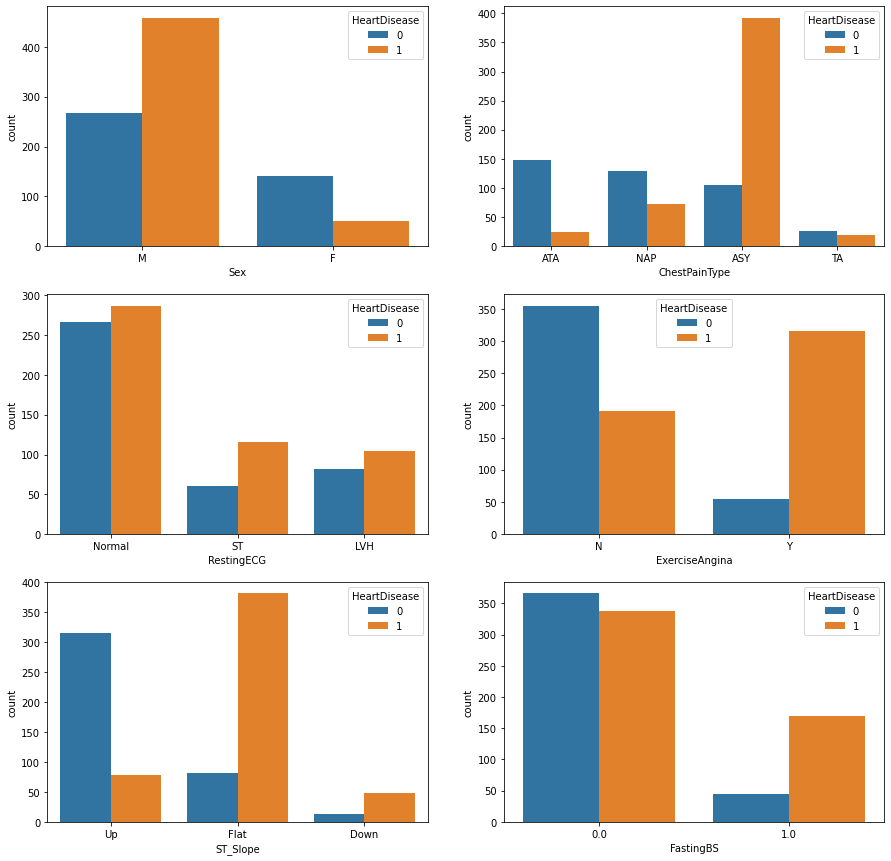

In [16]:
# bivarient analysis of categorical varieble
fig , ax = plt.subplots(3,2,figsize = (15,15))
cols = ["Sex","ChestPainType","RestingECG","ExerciseAngina",
         "ST_Slope","FastingBS"]
index = 0
for i in range(3):
    for j in range(2):
        sns.countplot(x = df[cols[index]] , hue = df["HeartDisease"] , ax = ax[i][j])
        index+=1

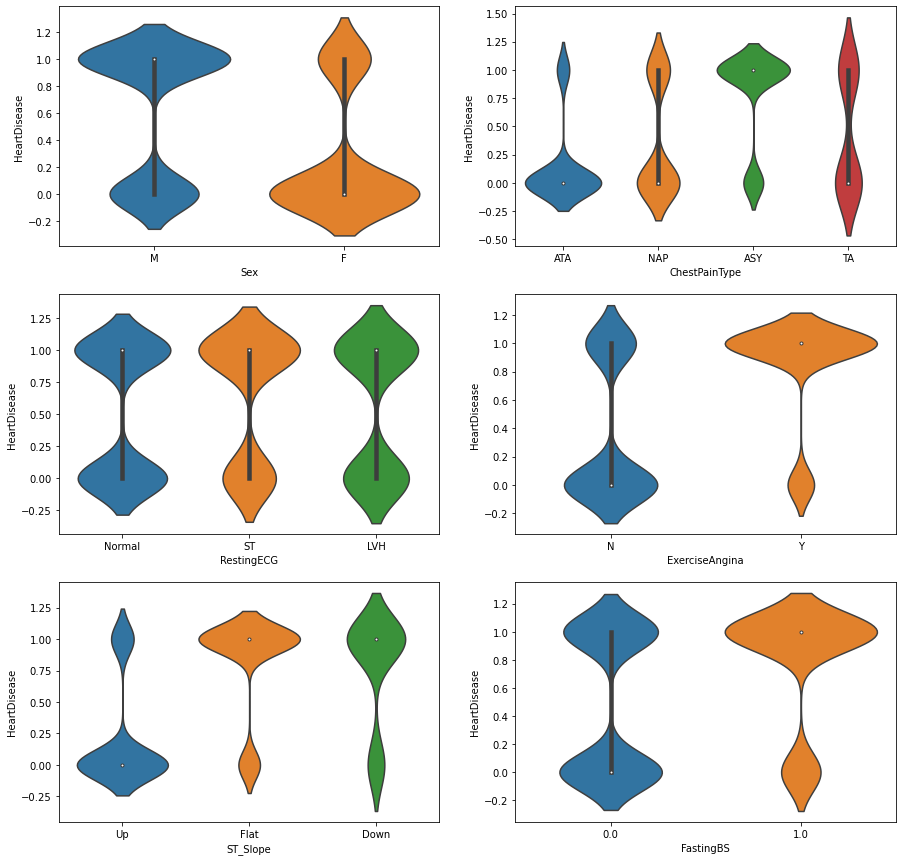

In [17]:
fig , ax = plt.subplots(3,2,figsize = (15,15))
cols = ["Sex","ChestPainType","RestingECG","ExerciseAngina",
         "ST_Slope","FastingBS"]
index = 0
for i in range(3):
    for j in range(2):
        sns.violinplot(x = df[cols[index]] , y = df["HeartDisease"] , ax = ax[i][j])
        index+=1

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

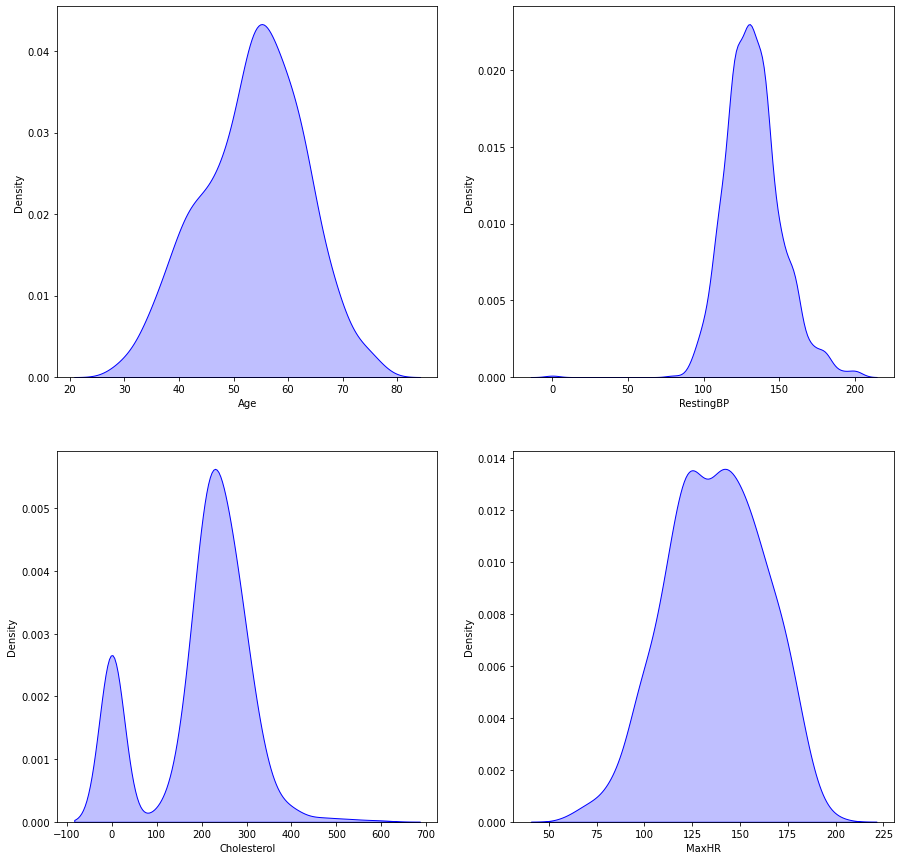

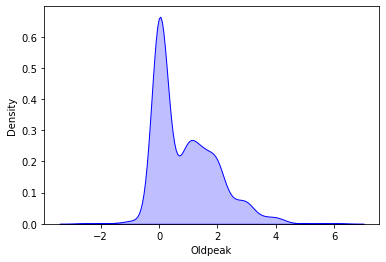

In [18]:
cols = ["Age","RestingBP","Cholesterol","MaxHR"]
fig , ax = plt.subplots(2,2,figsize = (15,15))
 
index = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[cols[index]] , ax = ax[i][j],color = "blue" , fill = True)
        index+=1
plt.figure()
sns.kdeplot(x = df["Oldpeak"],color = "blue" , fill = True) 

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

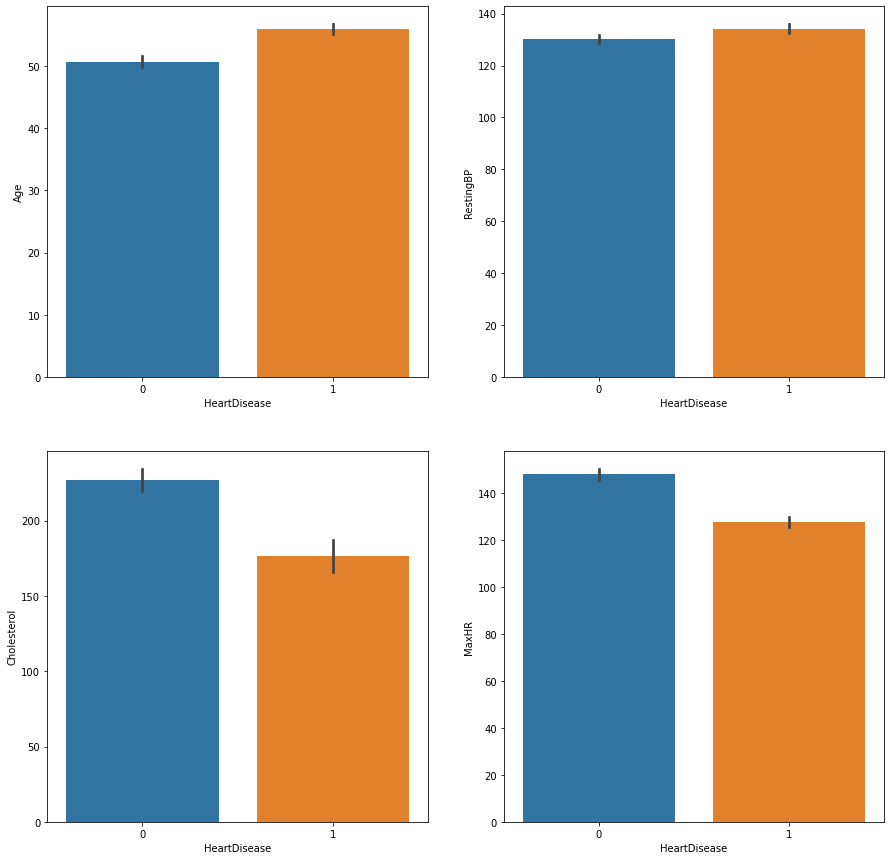

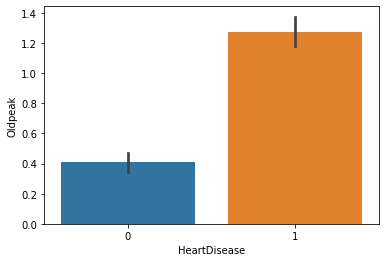

In [19]:
cols = ["Age","RestingBP","Cholesterol","MaxHR"]
fig , ax = plt.subplots(2,2,figsize = (15,15))
 
index = 0
for i in range(2):
    for j in range(2):
        sns.barplot(y = df[cols[index]] ,x=df["HeartDisease"], ax = ax[i][j])
        index+=1
plt.figure()
sns.barplot(y = df["Oldpeak"] ,x = df["HeartDisease"]) 

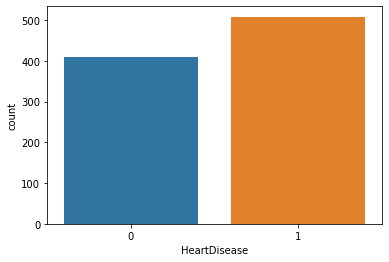

In [20]:
sns.countplot(x=df["HeartDisease"])
plt.show()

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0


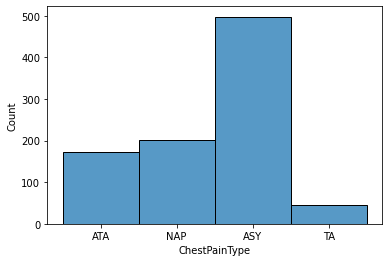

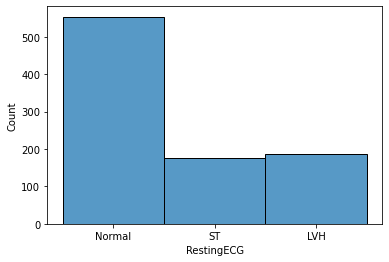

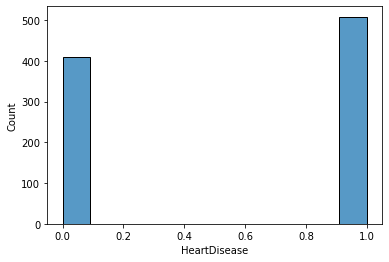

In [22]:
for i in ["ChestPainType", "RestingECG", "HeartDisease"]:
    plt.figure()
    sns.histplot(x = df[i])

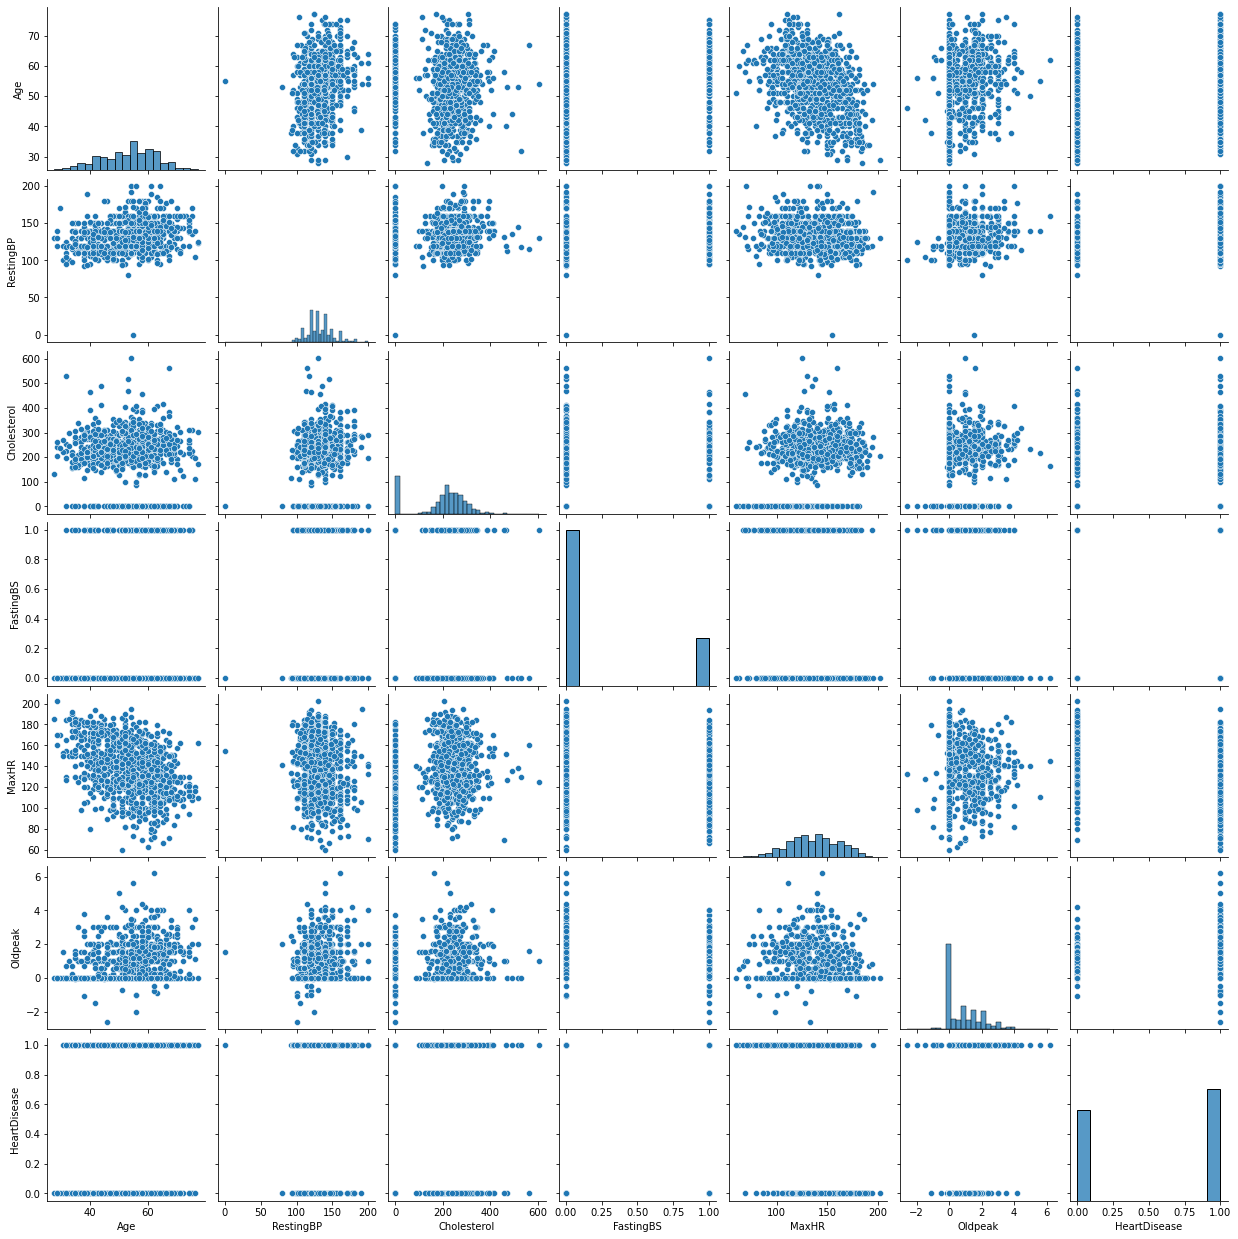

In [23]:
sns.pairplot(df)

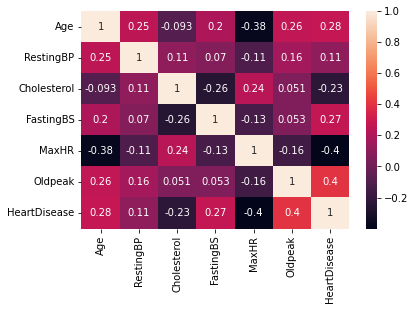

In [24]:
sns.heatmap(df.corr() , annot = True)
plt.show()

In [25]:
for i in ["ChestPainType","Sex","RestingECG","ExerciseAngina","ST_Slope"]:
    df = pd.get_dummies(data = df,columns = [i] , drop_first = True)

In [26]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0,1,0,0,1,1,0,0,0,1
1,49.0,160.0,180.0,0.0,156.0,1.0,1,0,1,0,0,1,0,0,1,0
2,37.0,130.0,283.0,0.0,98.0,0.0,0,1,0,0,1,0,1,0,0,1
3,48.0,138.0,214.0,0.0,108.0,1.5,1,0,0,0,0,1,0,1,1,0
4,54.0,150.0,195.0,0.0,122.0,0.0,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110.0,264.0,0.0,132.0,1.2,1,0,0,1,1,1,0,0,1,0
914,68.0,144.0,193.0,1.0,141.0,3.4,1,0,0,0,1,1,0,0,1,0
915,57.0,130.0,131.0,0.0,115.0,1.2,1,0,0,0,1,1,0,1,1,0
916,57.0,130.0,236.0,0.0,174.0,0.0,1,1,0,0,0,0,0,0,1,0


In [27]:
X = df.drop("HeartDisease" , axis = 1).values
Y = df[["HeartDisease"]].values

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42) 

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
Y_pred = lg.predict(X_test)

In [33]:
from sklearn import metrics
c_f = metrics.confusion_matrix(Y_test,Y_pred)

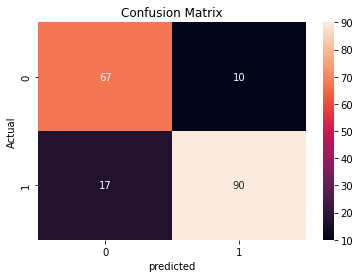

In [56]:
# confusion matric
sns.heatmap(c_f , annot = True)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
# accuracy
from sklearn import metrics 
metrics.accuracy_score(Y_test , Y_pred)

0.8532608695652174

In [36]:
tn,fp,fn,tp = metrics.confusion_matrix(Y_test,Y_pred).ravel()
print(tn,fp,fn,tp)

67 10 17 90


In [37]:
# classification matrix
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [38]:
y_pred_proba = lg.predict_proba(X_test)[:,1]

In [39]:
fpr , tpr , threshold = metrics.roc_curve(Y_test , y_pred_proba)

In [40]:
print(fpr)
print(tpr)

[0.         0.         0.         0.01298701 0.01298701 0.03896104
 0.03896104 0.05194805 0.05194805 0.06493506 0.06493506 0.09090909
 0.09090909 0.1038961  0.1038961  0.11688312 0.11688312 0.12987013
 0.12987013 0.15584416 0.15584416 0.19480519 0.19480519 0.25974026
 0.25974026 0.27272727 0.27272727 0.2987013  0.2987013  0.32467532
 0.32467532 0.41558442 0.41558442 0.64935065 0.64935065 0.74025974
 0.74025974 0.75324675 0.75324675 1.        ]
[0.         0.00934579 0.27102804 0.27102804 0.53271028 0.53271028
 0.62616822 0.62616822 0.68224299 0.68224299 0.71962617 0.71962617
 0.74766355 0.74766355 0.77570093 0.77570093 0.8411215  0.8411215
 0.87850467 0.87850467 0.91588785 0.91588785 0.92523364 0.92523364
 0.93457944 0.93457944 0.94392523 0.94392523 0.95327103 0.95327103
 0.96261682 0.96261682 0.97196262 0.97196262 0.98130841 0.98130841
 0.99065421 0.99065421 1.         1.        ]


In [41]:
auc = metrics.roc_auc_score(Y_test , y_pred_proba)
auc

0.9272970020633571

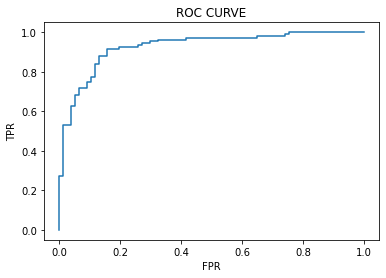

In [42]:
plt.plot(fpr,tpr , label = "auc is 0.9272970020633571")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

In [44]:
df = df.drop("RestingBP" , axis = 1)

In [46]:
X = df.drop("HeartDisease" , axis = 1).values
Y = df[["HeartDisease"]].values

In [47]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
Y_pred = lg.predict(X_test)

In [51]:
from sklearn import metrics
c_f = metrics.confusion_matrix(Y_test,Y_pred)

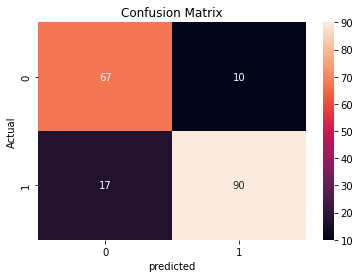

In [55]:
sns.heatmap(c_f , annot = True)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [57]:
from sklearn import metrics 
metrics.accuracy_score(Y_test , Y_pred)

0.8532608695652174

In [58]:
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [60]:
df.head()

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,289.0,0.0,172.0,0.0,0,1,0,0,1,1,0,0,0,1
1,49.0,180.0,0.0,156.0,1.0,1,0,1,0,0,1,0,0,1,0
2,37.0,283.0,0.0,98.0,0.0,0,1,0,0,1,0,1,0,0,1
3,48.0,214.0,0.0,108.0,1.5,1,0,0,0,0,1,0,1,1,0
4,54.0,195.0,0.0,122.0,0.0,0,0,1,0,1,1,0,0,0,1
